In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
#Read the csv file
file_path = Path("crypto_data.csv")
data = pd.read_csv(file_path)
data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
#Retrieve data 'IsTrading' equal 'True'
data_df = data[data['IsTrading'] == True]
data_df = data_df.drop(['IsTrading'], 1)
data_df

C:\Users\sherm\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
#drop the nulls
data_df = data_df.dropna(axis =0, how = 'any')
data_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#Retrieve TotalCoinsMined greater than zero
data_df2 = data_df[data_df['TotalCoinsMined'] > 0]
data_df2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
#drop the column CoinName
data_df3 = data_df2.drop(['CoinName'], 1)
data_df4 = data_df3.drop(['Unnamed: 0'], 1)
data_df4

C:\Users\sherm\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Users\sherm\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
#use get dummies to categorize the data
crypto_d = pd.get_dummies(data_df4)

crypto_d

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#standarize the data
scaler = StandardScaler().fit(crypto_d)
crypto_scaled = scaler.transform(crypto_d)
crypto_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [9]:
#Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the data.
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-2.67092248e-01, -1.16293969e-01, -6.08891182e-17, ...,
         2.31328268e-01,  2.76183189e-02,  8.59595615e-01],
       [-2.49924699e-01, -1.17272732e-01,  4.35108832e-16, ...,
         5.02830355e+00, -3.91095030e+00, -9.88681351e-01],
       [ 3.14746498e-01, -2.86187718e-03, -5.00073028e-15, ...,
         5.12448908e-01,  9.54819376e-02, -4.47898501e-01],
       ...,
       [-6.67192566e-02, -3.11211774e-01, -9.17914951e-15, ...,
         6.48630995e-01, -1.41563290e-01, -5.61181122e-01],
       [-2.90507995e-01, -2.45950491e-01, -9.30418097e-15, ...,
        -2.05252520e-15,  7.80960807e-16,  1.76216797e-15],
       [-1.99343294e-01, -6.23600551e-02,  1.93343891e-15, ...,
         4.20597456e-13, -8.06992834e-14,  1.21841901e-12]])

In [10]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(
    data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-6.088912e-17,4.917224e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,-2.170351e-01,-2.921363e-02,1.068354e-01,1.541274e+00,3.185030e-01,2.097818e+00,1.496036e+01,2.313283e-01,2.761832e-02,8.595956e-01
1,-0.249925,-0.117273,4.351088e-16,4.671289e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,-1.871453e+00,-3.857853e-01,1.572469e+00,5.320412e-01,1.226147e+00,4.881000e+00,-1.291075e+00,5.028304e+00,-3.910950e+00,-9.886814e-01
2,0.314746,-0.002862,-5.000730e-15,1.834754e-14,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,1.597861e+00,-1.631956e+00,-3.048667e-01,1.316138e+00,-8.438445e-01,-1.109320e+00,-2.230008e+00,5.124489e-01,9.548194e-02,-4.478985e-01
3,-0.250886,-0.222136,-8.291227e-15,-5.438805e-15,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,9.064277e-16,1.959911e-15,2.815964e-18,2.742124e-15,-9.036117e-16,-3.254003e-16,3.418161e-17,-3.954866e-16,-2.324735e-16,2.359778e-15
4,-0.119293,-0.222472,-1.561435e-15,-2.927495e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,-4.208302e-16,-1.391712e-15,6.908499e-16,1.551909e-15,-1.420498e-16,2.673289e-15,1.716108e-15,-3.504311e-16,-4.495531e-15,9.661887e-16


How did the number of features change?
The number of columns decreased from 377 (original scaled crypto data frame) to 274 (pca data frame).  

In [11]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=500)

In [12]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

C:\Users\sherm\Anaconda3\envs\tf2\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [13]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

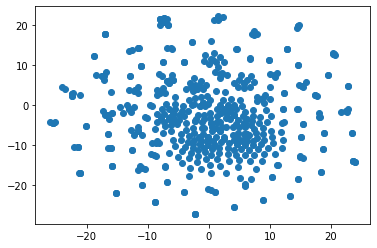

In [14]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

TSNE Analysis:
There aren't distinct clusters that can be observed.

C:\Users\sherm\Anaconda3\envs\tf2\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


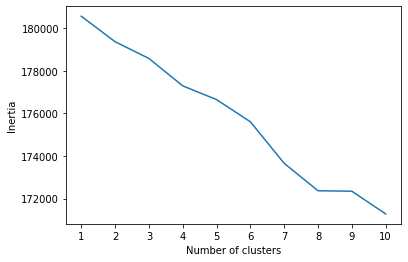

In [15]:
# Initializing KMean Model
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
crypto_elbow = pd.DataFrame(elbow_data)

plt.plot(crypto_elbow['k'], crypto_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

K-Means Analysis: There aren't any meaningful number of clusters based on the elbow graph.  It is more of a linear graph than an elbow graph.  